In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = './DNS_test_results_collated.csv'
data = pd.read_csv(file_path)

## CDF - Calculate the DNS resolution times
Calculations are based on the average response times for DNS and DoH

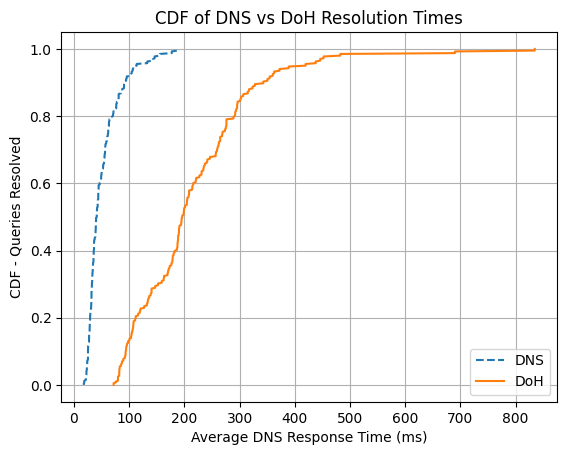

In [3]:
# Adapted from https://www.statology.org/cdf-python/

# Filter the data for DNS and DoH
dns_data = data[data['dns_type'] == 'DNS']['dns_avg_response_ms']
doh_data = data[data['dns_type'] == 'DOH']['dns_avg_response_ms']

# Sort the data for CDF calc
dns_sorted = np.sort(dns_data)
doh_sorted = np.sort(doh_data)

# Calculate CDF
cdf_dns = 1. * np.arange(len(dns_sorted)) / (len(dns_sorted) - 1)
cdf_doh = 1. * np.arange(len(doh_sorted)) / (len(doh_sorted) - 1)

# Create the graph
plt.plot(dns_sorted, cdf_dns, label="DNS", linestyle='--')
plt.plot(doh_sorted, cdf_doh, label="DoH", linestyle='-')
plt.xlabel('Average DNS Response Time (ms)')
plt.ylabel('CDF - Queries Resolved')
plt.title('CDF of DNS vs DoH Resolution Times')
plt.legend()
plt.grid(True)
plt.show()

## CDF - Calculate the page load times for DNS and DoH
The calculations are based on the page load time averages for both DNS and DoH

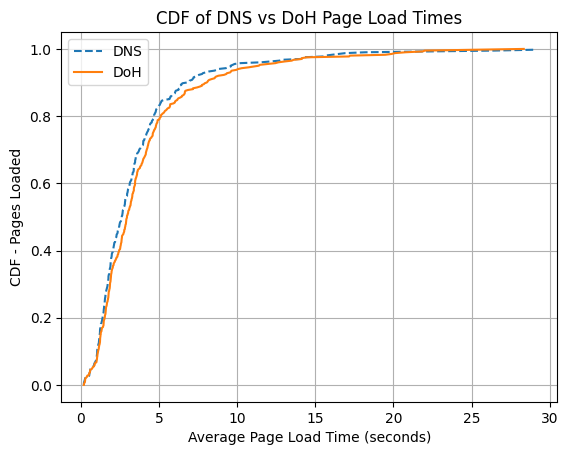

In [4]:
dns_page_load = data[data['dns_type'] == 'DNS']['page_load_avg_ms'] / 1000
doh_page_load = data[data['dns_type'] == 'DOH']['page_load_avg_ms'] / 1000

dns_page_load_sorted = np.sort(dns_page_load)
doh_page_load_sorted = np.sort(doh_page_load)

cdf_dns_page_load = 1. * np.arange(len(dns_page_load_sorted)) / (len(dns_page_load_sorted) - 1)
cdf_doh_page_load = 1. * np.arange(len(doh_page_load_sorted)) / (len(doh_page_load_sorted) - 1)

plt.plot(dns_page_load_sorted, cdf_dns_page_load, label="DNS", linestyle='--')
plt.plot(doh_page_load_sorted, cdf_doh_page_load, label="DoH", linestyle='-')
plt.xlabel('Average Page Load Time (seconds)')
plt.ylabel('CDF - Pages Loaded')
plt.title('CDF of DNS vs DoH Page Load Times')
plt.legend()
plt.grid(True)
plt.show()

# Resolver Stats

## CDF - Calculate the DNS resolution times by Resolver
Calculations are based on the average response times for DNS and DoH by Resolver e.g. Cloudflare, Google and Quad9

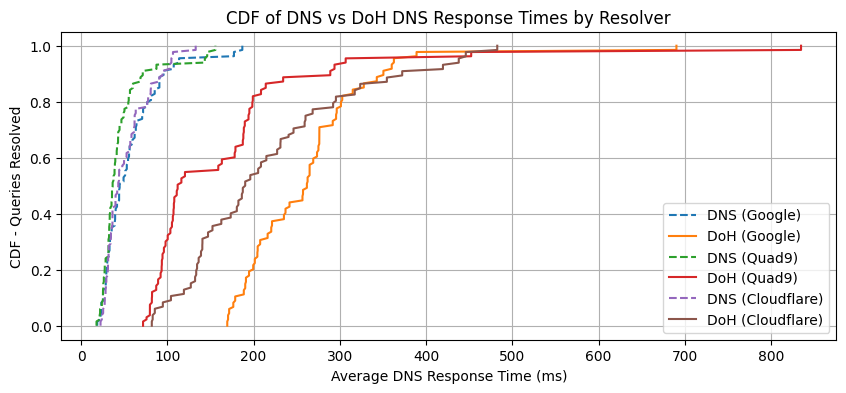

In [5]:
# Get the resolvers
resolvers = data['resolver'].unique()

plt.figure(figsize=(10, 4))

for resolver in resolvers:
    dns_data = data[(data['dns_type'] == 'DNS') & (data['resolver'] == resolver)]['dns_avg_response_ms']
    doh_data = data[(data['dns_type'] == 'DOH') & (data['resolver'] == resolver)]['dns_avg_response_ms']
    
    dns_sorted = np.sort(dns_data)
    doh_sorted = np.sort(doh_data)
    
    if len(dns_sorted) > 0:
        cdf_dns = 1. * np.arange(len(dns_sorted)) / (len(dns_sorted) - 1)
        plt.plot(dns_sorted, cdf_dns, label=f"DNS ({resolver})", linestyle='--')
    
    if len(doh_sorted) > 0:
        cdf_doh = 1. * np.arange(len(doh_sorted)) / (len(doh_sorted) - 1)
        plt.plot(doh_sorted, cdf_doh, label=f"DoH ({resolver})", linestyle='-')

plt.xlabel('Average DNS Response Time (ms)')
plt.ylabel('CDF - Queries Resolved')
plt.title('CDF of DNS vs DoH DNS Response Times by Resolver')
plt.legend()
plt.grid(True)
plt.show()

## CDF - Calculate the page load times for DNS and DoH by Resolver
The calculations are based on the page load time averages for both DNS and DoH by Resolver e.g. Cloudflare, Google and Quad9

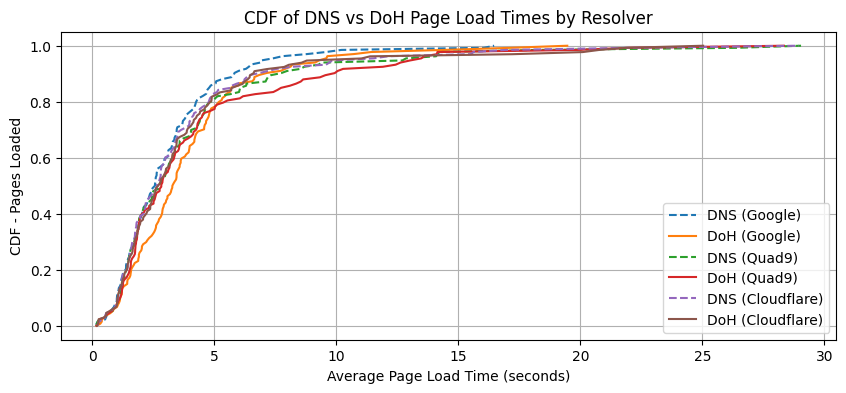

In [6]:
# Get the resolvers
resolvers = data['resolver'].unique()

plt.figure(figsize=(10, 4))

for resolver in resolvers:
    dns_page_load = data[(data['dns_type'] == 'DNS') & (data['resolver'] == resolver)]['page_load_avg_ms'] / 1000
    doh_page_load = data[(data['dns_type'] == 'DOH') & (data['resolver'] == resolver)]['page_load_avg_ms'] / 1000
    
    dns_page_load_sorted = np.sort(dns_page_load)
    doh_page_load_sorted = np.sort(doh_page_load)
    
    if len(dns_page_load_sorted) > 0:
        cdf_dns_page_load = 1. * np.arange(len(dns_page_load_sorted)) / (len(dns_page_load_sorted) - 1)
        plt.plot(dns_page_load_sorted, cdf_dns_page_load, label=f"DNS ({resolver})", linestyle='--')
    
    if len(doh_page_load_sorted) > 0:
        cdf_doh_page_load = 1. * np.arange(len(doh_page_load_sorted)) / (len(doh_page_load_sorted) - 1)
        plt.plot(doh_page_load_sorted, cdf_doh_page_load, label=f"DoH ({resolver})", linestyle='-')

plt.xlabel('Average Page Load Time (seconds)')
plt.ylabel('CDF - Pages Loaded')
plt.title('CDF of DNS vs DoH Page Load Times by Resolver')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
### Average Page Load Times by Resolver Line Graph

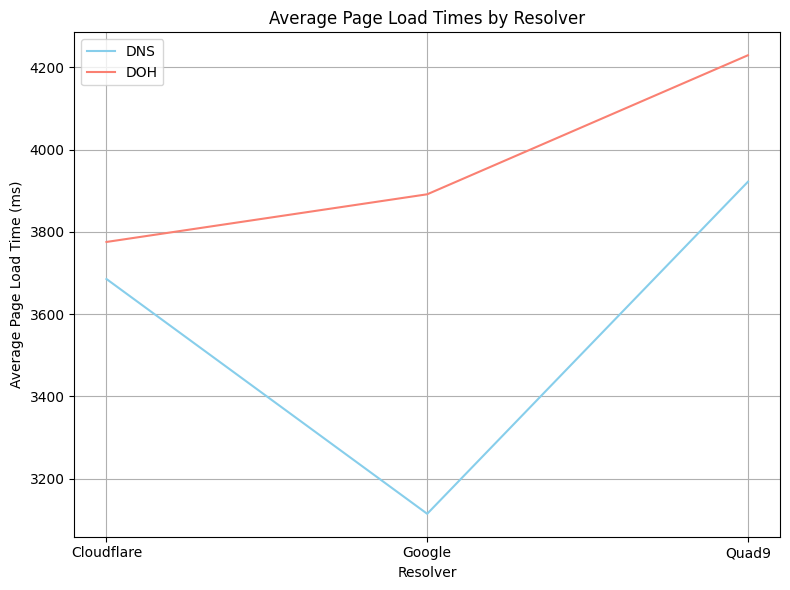

In [29]:
grouped_page_load_data = data.groupby(['resolver', 'dns_type'])['page_load_avg_ms'].mean().unstack()

plt.figure(figsize=(8, 6))
plt.plot(grouped_page_load_data.index, grouped_page_load_data['DNS'], label="DNS", color='skyblue')
plt.plot(grouped_page_load_data.index, grouped_page_load_data['DOH'], label="DOH", color='salmon')
plt.title('Average Page Load Times by Resolver')
plt.xlabel('Resolver')
plt.ylabel('Average Page Load Time (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [9]:
resolver_stats = data.groupby(['resolver'])[['dns_avg_response_ms', 'page_load_avg_ms']].mean().reset_index()

resolver_stats.rename(columns={
    'dns_avg_response_ms': 'Average DNS Resolution Time (ms)',
    'page_load_avg_ms': 'Average Page Load Time (ms)',
}, inplace=True)

print("DNS Resolver Statistics")
print(resolver_stats)

DNS Resolver Statistics
     resolver  Average DNS Resolution Time (ms)  Average Page Load Time (ms)
0  Cloudflare                        133.998303                  3730.272180
1      Google                        160.257956                  3502.981467
2       Quad9                        106.481922                  4075.562187


# Postcode Comparison

In [10]:
data.head()

,id,postcode,date_time,website,resolver,network_download_mbps,network_upload_mbps,network_latency_ms,dns_type,browser,page_load_min_ms,page_load_max_ms,page_load_avg_ms,dns_requests_transmitted,dns_responses_received,dns_lost_percentage,dns_min_response_ms,dns_avg_response_ms,dns_max_response_ms,dns_stddev_ms
0,43a19efe-0f1f-4116-80df-61f61bfe04a8,2607,2024-09-19 11:33:34,https://en.wikipedia.org,Google,49.374896,12.965151,20.065,DNS,Chrome,1345,1447,1393.333,5,5,0,16.595,22.644,41.942,10.817
1,43a19efe-0f1f-4116-80df-61f61bfe04a8,2607,2024-09-19 11:33:34,https://en.wikipedia.org,Google,49.374896,12.965151,20.065,DOH,Chrome,1474,1645,1568.333,5,5,0,167.165,171.625,175.594,3.003
2,43a19efe-0f1f-4116-80df-61f61bfe04a8,2607,2024-09-19 11:33:34,https://en.wikipedia.org,Google,49.374896,12.965151,20.065,DNS,Firefox,1158,1197,1179.333,5,5,0,16.595,22.644,41.942,10.817
3,43a19efe-0f1f-4116-80df-61f61bfe04a8,2607,2024-09-19 11:33:34,https://en.wikipedia.org,Google,49.374896,12.965151,20.065,DNS,Edge,1316,1419,1384.000,5,5,0,16.595,22.644,41.942,10.817
4,43a19efe-0f1f-4116-80df-61f61bfe04a8,2607,2024-09-19 11:33:34,https://en.wikipedia.org,Google,49.374896,12.965151,20.065,DOH,Firefox,3120,3354,3230.667,5,5,0,167.165,171.625,175.594,3.003


## CDF - Calculate page load times by Postcode

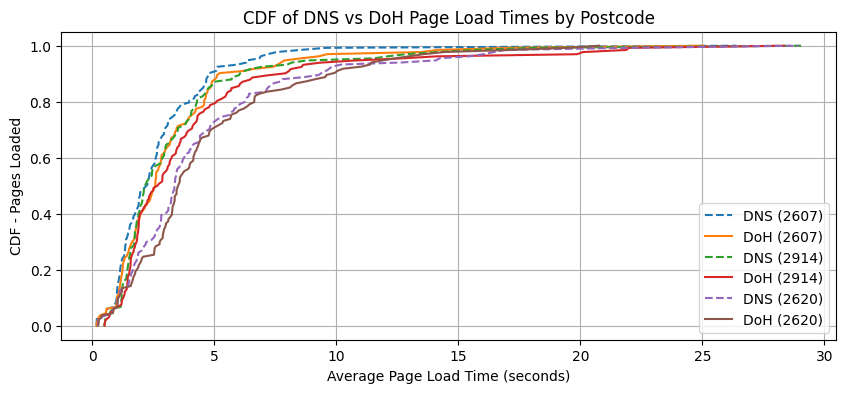

In [11]:
postcodes = data['postcode'].unique()

plt.figure(figsize=(10, 4))

for postcode in postcodes:
    dns_page_load = data[(data['dns_type'] == 'DNS') & (data['postcode'] == postcode)]['page_load_avg_ms'] / 1000
    doh_page_load = data[(data['dns_type'] == 'DOH') & (data['postcode'] == postcode)]['page_load_avg_ms'] / 1000 
    
    dns_page_load_sorted = np.sort(dns_page_load)
    doh_page_load_sorted = np.sort(doh_page_load)
    
    if len(dns_page_load_sorted) > 0:
        cdf_dns_page_load = 1. * np.arange(len(dns_page_load_sorted)) / (len(dns_page_load_sorted) - 1)
        plt.plot(dns_page_load_sorted, cdf_dns_page_load, label=f"DNS ({postcode})", linestyle='--')
    
    if len(doh_page_load_sorted) > 0:
        cdf_doh_page_load = 1. * np.arange(len(doh_page_load_sorted)) / (len(doh_page_load_sorted) - 1)
        plt.plot(doh_page_load_sorted, cdf_doh_page_load, label=f"DoH ({postcode})", linestyle='-')

plt.xlabel('Average Page Load Time (seconds)')
plt.ylabel('CDF - Pages Loaded')
plt.title('CDF of DNS vs DoH Page Load Times by Postcode')
plt.legend()
plt.grid(True)
plt.show()

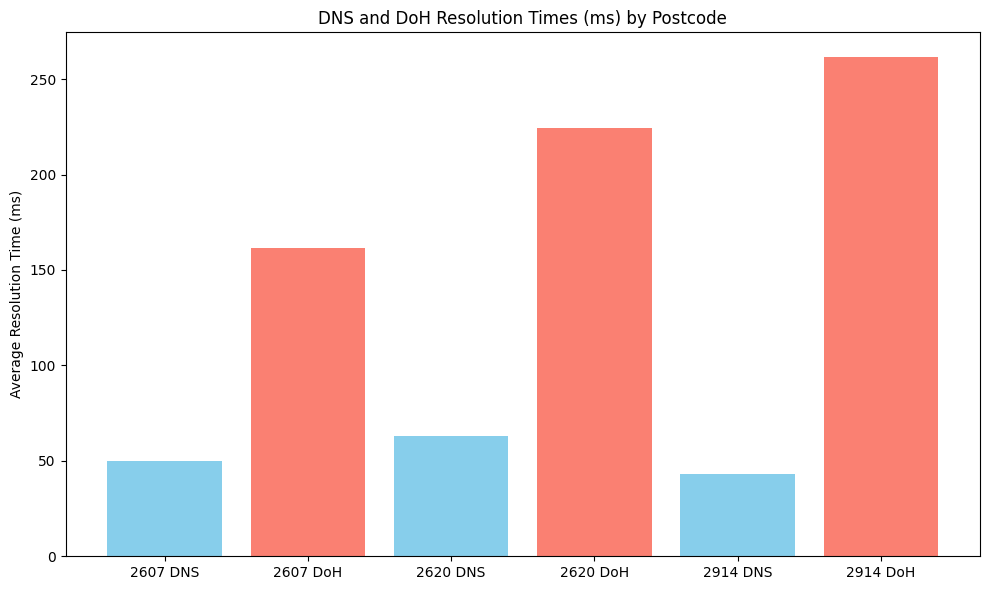

In [12]:
grouped_stats = data.groupby(['postcode', 'dns_type']).agg({
    'dns_avg_response_ms': ['mean', 'std', 'count'],
    'page_load_avg_ms': ['mean', 'std', 'count']
}).reset_index()

postcode_2607_dns_mean = grouped_stats[(grouped_stats['postcode'] == 2607) & (grouped_stats['dns_type'] == 'DNS')]['dns_avg_response_ms']['mean'].values[0]
postcode_2607_doh_mean = grouped_stats[(grouped_stats['postcode'] == 2607) & (grouped_stats['dns_type'] == 'DOH')]['dns_avg_response_ms']['mean'].values[0]
postcode_2620_dns_mean = grouped_stats[(grouped_stats['postcode'] == 2620) & (grouped_stats['dns_type'] == 'DNS')]['dns_avg_response_ms']['mean'].values[0]
postcode_2620_doh_mean = grouped_stats[(grouped_stats['postcode'] == 2620) & (grouped_stats['dns_type'] == 'DOH')]['dns_avg_response_ms']['mean'].values[0]
postcode_2914_dns_mean = grouped_stats[(grouped_stats['postcode'] == 2914) & (grouped_stats['dns_type'] == 'DNS')]['dns_avg_response_ms']['mean'].values[0]
postcode_2914_doh_mean = grouped_stats[(grouped_stats['postcode'] == 2914) & (grouped_stats['dns_type'] == 'DOH')]['dns_avg_response_ms']['mean'].values[0]

labels = ['2607 DNS', '2607 DoH', '2620 DNS', '2620 DoH', '2914 DNS', '2914 DoH']
values = [postcode_2607_dns_mean, postcode_2607_doh_mean, postcode_2620_dns_mean, postcode_2620_doh_mean, postcode_2914_dns_mean, postcode_2914_doh_mean]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('DNS and DoH Resolution Times (ms) by Postcode')
plt.ylabel('Average Resolution Time (ms)')
plt.tight_layout()
plt.show()

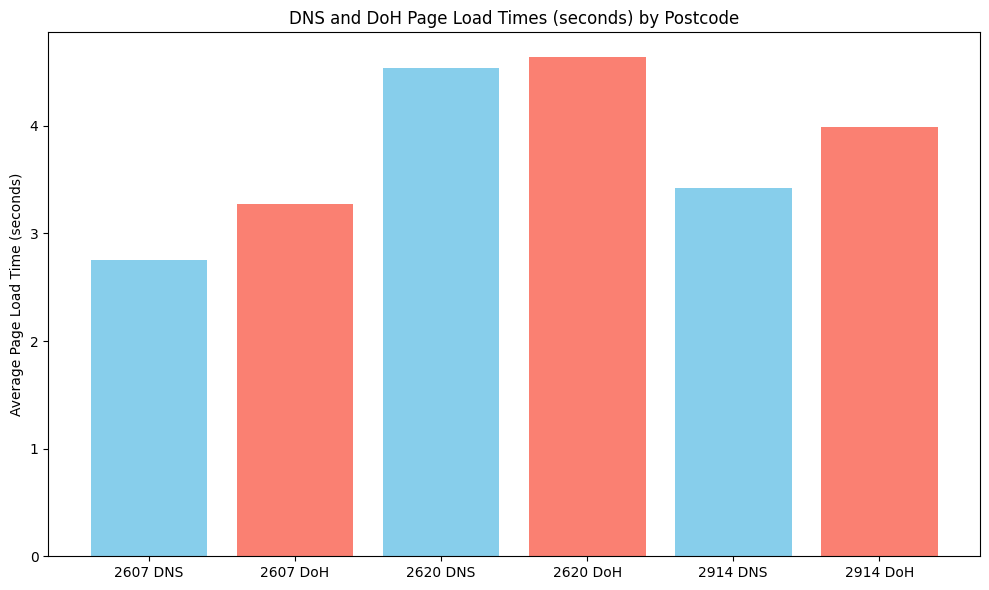

In [13]:
postcode_2607_dns_page_load_mean = grouped_stats[(grouped_stats['postcode'] == 2607) & (grouped_stats['dns_type'] == 'DNS')]['page_load_avg_ms']['mean'].values[0]
postcode_2607_doh_page_load_mean = grouped_stats[(grouped_stats['postcode'] == 2607) & (grouped_stats['dns_type'] == 'DOH')]['page_load_avg_ms']['mean'].values[0]
postcode_2620_dns_page_load_mean = grouped_stats[(grouped_stats['postcode'] == 2620) & (grouped_stats['dns_type'] == 'DNS')]['page_load_avg_ms']['mean'].values[0]
postcode_2620_doh_page_load_mean = grouped_stats[(grouped_stats['postcode'] == 2620) & (grouped_stats['dns_type'] == 'DOH')]['page_load_avg_ms']['mean'].values[0]
postcode_2914_dns_page_load_mean = grouped_stats[(grouped_stats['postcode'] == 2914) & (grouped_stats['dns_type'] == 'DNS')]['page_load_avg_ms']['mean'].values[0]
postcode_2914_doh_page_load_mean = grouped_stats[(grouped_stats['postcode'] == 2914) & (grouped_stats['dns_type'] == 'DOH')]['page_load_avg_ms']['mean'].values[0]

labels_page_load = ['2607 DNS', '2607 DoH', '2620 DNS', '2620 DoH', '2914 DNS', '2914 DoH']
values_page_load = [postcode_2607_dns_page_load_mean, postcode_2607_doh_page_load_mean, postcode_2620_dns_page_load_mean, postcode_2620_doh_page_load_mean, postcode_2914_dns_page_load_mean, postcode_2914_doh_page_load_mean]

plt.figure(figsize=(10, 6))
plt.bar(labels_page_load, [val / 1000 for val in values_page_load], color=['skyblue', 'salmon'])
plt.title('DNS and DoH Page Load Times (seconds) by Postcode')
plt.ylabel('Average Page Load Time (seconds)')
plt.tight_layout()
plt.show()

In [14]:
## General Stats

In [15]:
# Overall stats for DNS resolution times by DNS type
dns_stats = data[['dns_type', 'dns_avg_response_ms']].groupby('dns_type').describe()
print("\nDNS Resolution Times Stats by DNS Type:")
print(dns_stats)


DNS Resolution Times Stats by DNS Type:
         dns_avg_response_ms                                            \
                       count        mean         std     min       25%   
dns_type                                                                 
DNS                    403.0   51.904074   31.649683  17.836   31.6300   
DOH                    402.0  215.589572  113.473308  71.806  133.6905   

                                     
              50%      75%      max  
dns_type                             
DNS        41.256   61.951  186.913  
DOH       196.140  269.125  834.751  


In [16]:
# Overall stats for Page Load Times by DNS type
page_load_stats = data[['dns_type', 'page_load_avg_ms']].groupby('dns_type').describe()
print("\nPage Load Times Stats by DNS Type:")
print(page_load_stats)


Page Load Times Stats by DNS Type:
         page_load_avg_ms                                                \
                    count         mean          std      min        25%   
dns_type                                                                  
DNS                 403.0  3572.790734  3692.133321  184.000  1521.6665   
DOH                 402.0  3965.680766  3857.429195  181.333  1705.1665   

                                        
               50%      75%        max  
dns_type                                
DNS       2609.667  4219.50  29045.000  
DOH       2944.500  4608.25  28343.333  


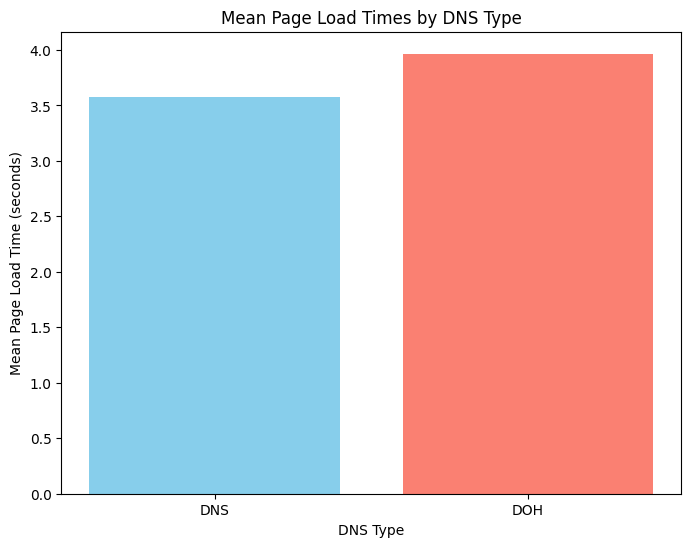

In [17]:
# Calc mean page load times
mean_page_load = data.groupby('dns_type')['page_load_avg_ms'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(mean_page_load['dns_type'], mean_page_load['page_load_avg_ms'] / 1000, color=['skyblue', 'salmon'])
plt.title('Mean Page Load Times by DNS Type')
plt.xlabel('DNS Type')
plt.ylabel('Mean Page Load Time (seconds)')
plt.show()

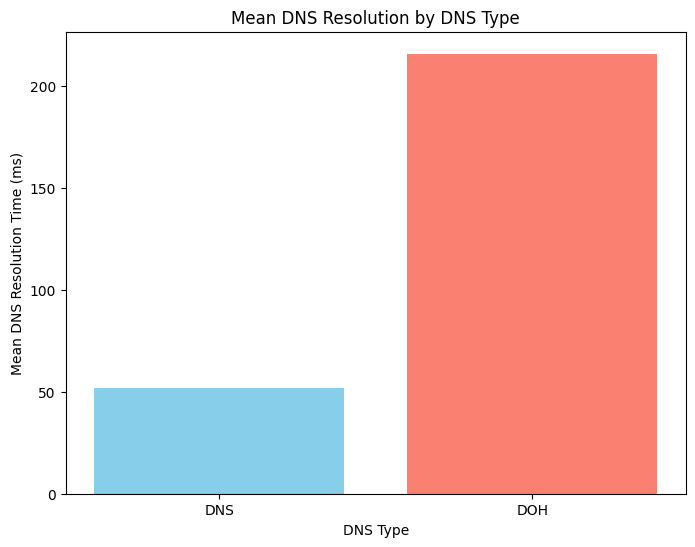

In [18]:
# Calc mean page load times
mean_dns = data.groupby('dns_type')['dns_avg_response_ms'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(mean_dns['dns_type'], mean_dns['dns_avg_response_ms'], color=['skyblue', 'salmon'])
plt.title('Mean DNS Resolution by DNS Type')
plt.xlabel('DNS Type')
plt.ylabel('Mean DNS Resolution Time (ms)')
plt.show()

## Comparing Australian Websites against International

In [19]:

def categorize_domain_group(ext):
    if '.com.au' in ext:
        return 'Australia' 
    elif '.gov.au' in ext:
        return 'Australia' 
    elif '.com' in ext:
        return 'International'
    elif '.org' in ext:
        return 'International'
    else:
        return 'Other'

data['domain_group'] = data['website'].apply(categorize_domain_group)

print("\nDomain Extensions and Groups:")
print(data[['website', 'domain_group']].head())


Domain Extensions and Groups:
                    website   domain_group
0  https://en.wikipedia.org  International
1  https://en.wikipedia.org  International
2  https://en.wikipedia.org  International
3  https://en.wikipedia.org  International
4  https://en.wikipedia.org  International


In [20]:
filtered_data = data[data['domain_group'].isin(['Australia','International'])]

grouped_stats = filtered_data.groupby(['domain_group', 'dns_type']).agg({
    'dns_avg_response_ms': ['mean', 'std', 'count'],
    'page_load_avg_ms': ['mean', 'std', 'count']
}).reset_index()

print("\nSummary by Domain Group and DNS Type:")
print(grouped_stats)



Summary by Domain Group and DNS Type:
    domain_group dns_type dns_avg_response_ms                    \
                                         mean         std count   
0      Australia      DNS           35.461604   15.234356   134   
1      Australia      DOH          179.813391   75.300982   133   
2  International      DNS           60.094747   34.421825   269   
3  International      DOH          233.278167  124.596119   269   

  page_load_avg_ms                     
              mean          std count  
0      3747.634321  3587.660976   134  
1      4324.120316  3990.767948   133  
2      3485.693929  3746.631158   269  
3      3788.459725  3784.781632   269  


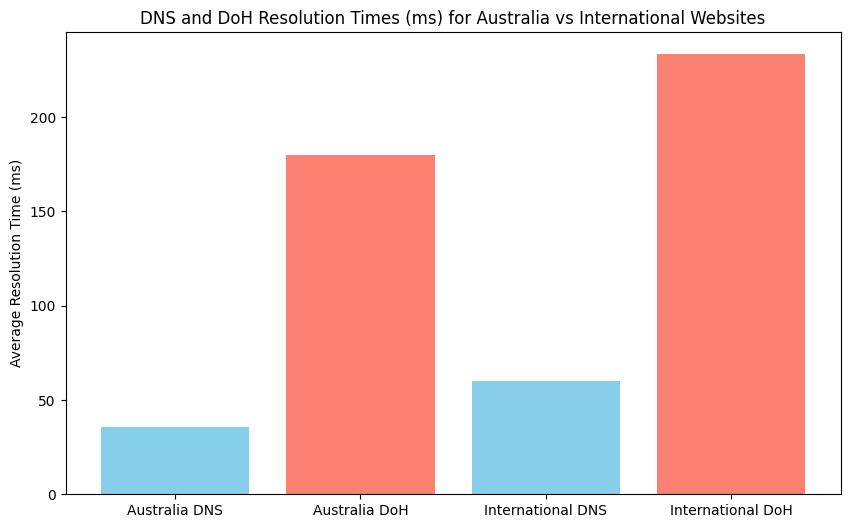

In [21]:
grouped_stats = filtered_data.groupby(['domain_group', 'dns_type']).agg({
    'dns_avg_response_ms': ['mean', 'std', 'count'],
    'page_load_avg_ms': ['mean', 'std', 'count']
}).reset_index()

au_dns_mean = grouped_stats[(grouped_stats['domain_group'] == 'Australia') & (grouped_stats['dns_type'] == 'DNS')]['dns_avg_response_ms']['mean'].values[0]
au_doh_mean = grouped_stats[(grouped_stats['domain_group'] == 'Australia') & (grouped_stats['dns_type'] == 'DOH')]['dns_avg_response_ms']['mean'].values[0]
intl_dns_mean = grouped_stats[(grouped_stats['domain_group'] == 'International') & (grouped_stats['dns_type'] == 'DNS')]['dns_avg_response_ms']['mean'].values[0]
intl_doh_mean = grouped_stats[(grouped_stats['domain_group'] == 'International') & (grouped_stats['dns_type'] == 'DOH')]['dns_avg_response_ms']['mean'].values[0]

labels = ['Australia DNS', 'Australia DoH', 'International DNS', 'International DoH']
values = [au_dns_mean, au_doh_mean, intl_dns_mean, intl_doh_mean]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('DNS and DoH Resolution Times (ms) for Australia vs International Websites')
plt.ylabel('Average Resolution Time (ms)')
plt.show()

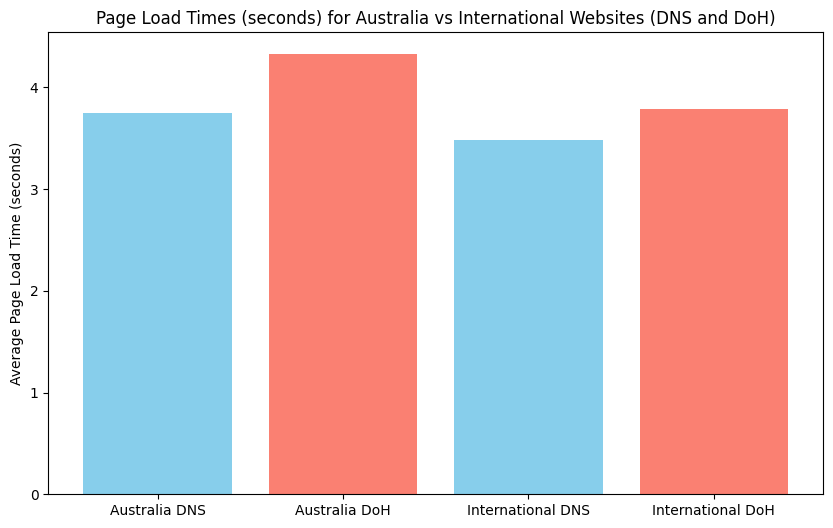

In [22]:
au_dns_page_load_mean = grouped_stats[(grouped_stats['domain_group'] == 'Australia') & (grouped_stats['dns_type'] == 'DNS')]['page_load_avg_ms']['mean'].values[0] / 1000
au_doh_page_load_mean = grouped_stats[(grouped_stats['domain_group'] == 'Australia') & (grouped_stats['dns_type'] == 'DOH')]['page_load_avg_ms']['mean'].values[0] / 1000
intl_dns_page_load_mean = grouped_stats[(grouped_stats['domain_group'] == 'International') & (grouped_stats['dns_type'] == 'DNS')]['page_load_avg_ms']['mean'].values[0] / 1000
intl_doh_page_load_mean = grouped_stats[(grouped_stats['domain_group'] == 'International') & (grouped_stats['dns_type'] == 'DOH')]['page_load_avg_ms']['mean'].values[0] /1000

labels = ['Australia DNS', 'Australia DoH', 'International DNS', 'International DoH']
page_load_values = [au_dns_page_load_mean, au_doh_page_load_mean, intl_dns_page_load_mean, intl_doh_page_load_mean]

plt.figure(figsize=(10, 6))
plt.bar(labels, page_load_values, color=['skyblue', 'salmon'])
plt.title('Page Load Times (seconds) for Australia vs International Websites (DNS and DoH)')
plt.ylabel('Average Page Load Time (seconds)')
plt.show()

In [23]:
resolver_stats = data.groupby(['resolver', 'dns_type'])[['dns_avg_response_ms', 'page_load_avg_ms']].mean().reset_index()

resolver_stats.rename(columns={
    'dns_avg_response_ms': 'Average DNS Resolution Time (ms)', 'page_load_avg_ms': 'Average Page Load Time (ms)',
}, inplace=True)


print("DNS Resolver Statistics with DNS Type")
print(resolver_stats)

DNS Resolver Statistics with DNS Type
     resolver dns_type  Average DNS Resolution Time (ms)  \
0  Cloudflare      DNS                         52.356127   
1  Cloudflare      DOH                        216.254331   
2      Google      DNS                         56.939289   
3      Google      DOH                        263.576622   
4       Quad9      DNS                         46.379231   
5       Quad9      DOH                        166.584612   

   Average Page Load Time (ms)  
0                  3685.410455  
1                  3775.471211  
2                  3114.602467  
3                  3891.360467  
4                  3921.778597  
5                  4229.345776  


In [24]:
browser_stats = data.groupby(['browser', 'dns_type'])[['dns_avg_response_ms', 'page_load_avg_ms']].mean().reset_index()

browser_stats.rename(columns={
    'dns_avg_response_ms': 'Average DNS Resolution Time (ms)',
    'page_load_avg_ms': 'Average Page Load Time (ms)',
}, inplace=True)

print("\nBrowser Statistics with DNS Type")
print(browser_stats)


Browser Statistics with DNS Type
   browser dns_type  Average DNS Resolution Time (ms)  \
0   Chrome      DNS                         51.920791   
1   Chrome      DOH                        215.156933   
2     Edge      DNS                         51.901896   
3     Edge      DOH                        216.273865   
4  Firefox      DNS                         51.889644   
5  Firefox      DOH                        215.344852   

   Average Page Load Time (ms)  
0                  2868.907948  
1                  3438.860701  
2                  3510.159216  
3                  3298.558902  
4                  4333.627156  
5                  5145.837037  


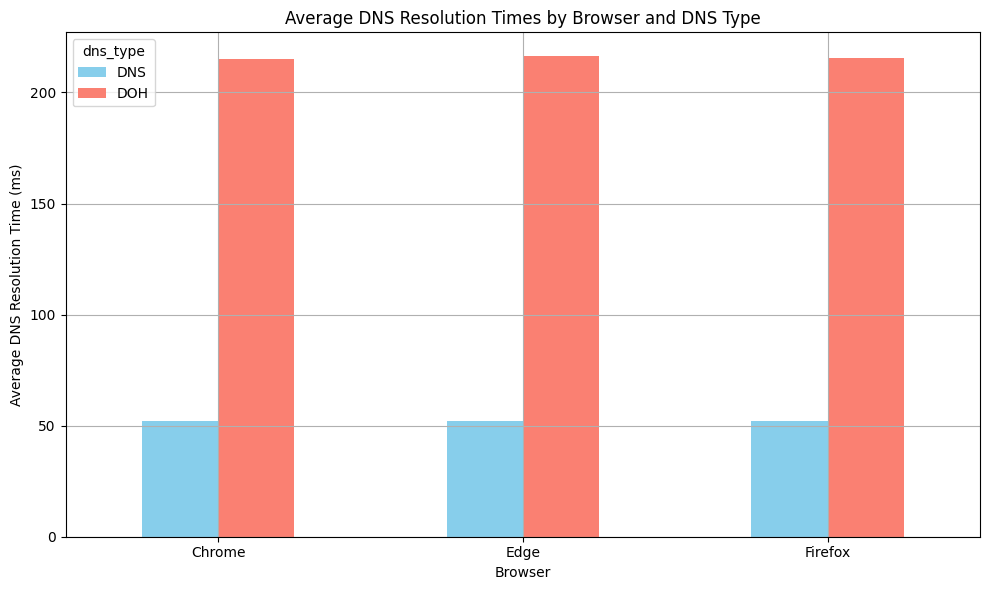

In [25]:
dns_resolution_data = data.groupby(['browser', 'dns_type'])['dns_avg_response_ms'].mean().unstack()

dns_resolution_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Average DNS Resolution Times by Browser and DNS Type')
plt.xlabel('Browser')
plt.ylabel('Average DNS Resolution Time (ms)')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

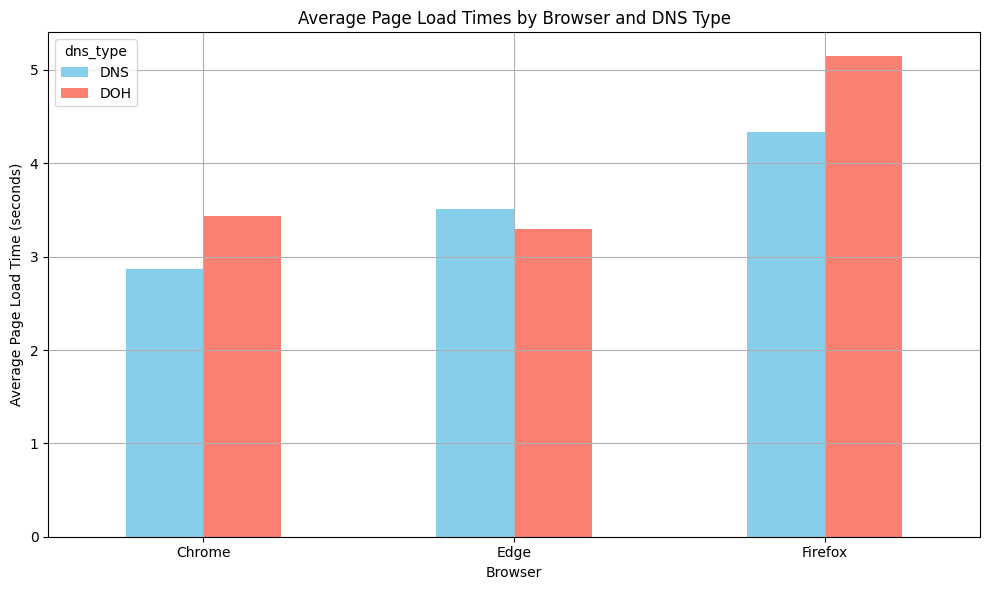

In [26]:
page_load_data = data.groupby(['browser', 'dns_type'])['page_load_avg_ms'].mean().unstack()

page_load_data = page_load_data / 1000

page_load_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Average Page Load Times by Browser and DNS Type')
plt.xlabel('Browser')
plt.ylabel('Average Page Load Time (seconds)')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Average Page load Times per browser - Line Graph

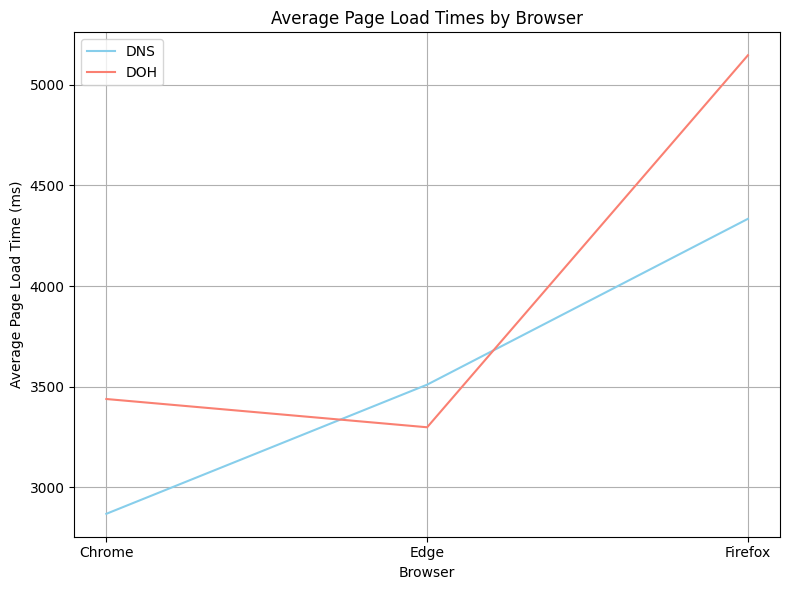

In [31]:
grouped_browser_page_load_data = data.groupby(['browser', 'dns_type'])['page_load_avg_ms'].mean().unstack()

plt.figure(figsize=(8, 6))
plt.plot(grouped_browser_page_load_data.index, grouped_browser_page_load_data['DNS'], label="DNS", color='skyblue')
plt.plot(grouped_browser_page_load_data.index, grouped_browser_page_load_data['DOH'], label="DOH", color='salmon')
plt.title('Average Page Load Times by Browser')
plt.xlabel('Browser')
plt.ylabel('Average Page Load Time (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


# Browser Stats


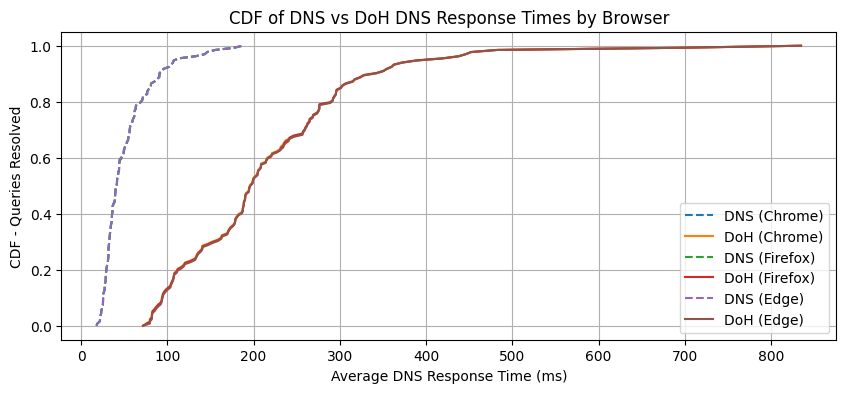

In [27]:
browsers = data['browser'].unique()

plt.figure(figsize=(10, 4))

for browser in browsers:
    dns_data = data[(data['dns_type'] == 'DNS') & (data['browser'] == browser)]['dns_avg_response_ms']
    doh_data = data[(data['dns_type'] == 'DOH') & (data['browser'] == browser)]['dns_avg_response_ms']
    
    dns_sorted = np.sort(dns_data)
    doh_sorted = np.sort(doh_data)
    
    if len(dns_sorted) > 0:
        cdf_dns = 1. * np.arange(len(dns_sorted)) / (len(dns_sorted) - 1)
        plt.plot(dns_sorted, cdf_dns, label=f"DNS ({browser})", linestyle='--')
    
    if len(doh_sorted) > 0:
        cdf_doh = 1. * np.arange(len(doh_sorted)) / (len(doh_sorted) - 1)
        plt.plot(doh_sorted, cdf_doh, label=f"DoH ({browser})", linestyle='-')

plt.xlabel('Average DNS Response Time (ms)')
plt.ylabel('CDF - Queries Resolved')
plt.title('CDF of DNS vs DoH DNS Response Times by Browser')
plt.legend()
plt.grid(True)
plt.show()

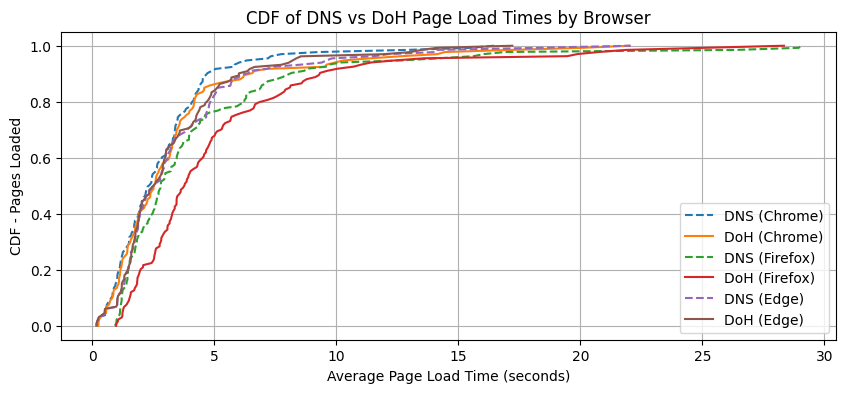

In [28]:
browsers = data['browser'].unique()

plt.figure(figsize=(10, 4))

for browser in browsers:
    dns_page_load = data[(data['dns_type'] == 'DNS') & (data['browser'] == browser)]['page_load_avg_ms'] / 1000
    doh_page_load = data[(data['dns_type'] == 'DOH') & (data['browser'] == browser)]['page_load_avg_ms'] / 1000
    
    dns_page_load_sorted = np.sort(dns_page_load)
    doh_page_load_sorted = np.sort(doh_page_load)
    
    if len(dns_page_load_sorted) > 0:
        cdf_dns_page_load = 1. * np.arange(len(dns_page_load_sorted)) / (len(dns_page_load_sorted) - 1)
        plt.plot(dns_page_load_sorted, cdf_dns_page_load, label=f"DNS ({browser})", linestyle='--')
    
    if len(doh_page_load_sorted) > 0:
        cdf_doh_page_load = 1. * np.arange(len(doh_page_load_sorted)) / (len(doh_page_load_sorted) - 1)
        plt.plot(doh_page_load_sorted, cdf_doh_page_load, label=f"DoH ({browser})", linestyle='-')

plt.xlabel('Average Page Load Time (seconds)')
plt.ylabel('CDF - Pages Loaded')
plt.title('CDF of DNS vs DoH Page Load Times by Browser')
plt.legend()
plt.grid(True)
plt.show()